In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

from db_reader import retrieve_listings, retrieve_leases

load_dotenv()  # load the required SnowFlake ENV variables
sns.set_style("whitegrid")

In [2]:
df = retrieve_listings()
# can export to CSV and read from it next time

In [3]:
df.head()

,listing_id,bedrooms,bathrooms,sqft_livable,monthly_price
0,823,1,1.5,751.0,3988
1,816,1,1.0,543.0,3613
2,141,2,1.0,1000.0,4187
3,1969,2,2.0,1208.0,5750
4,4946,2,2.0,925.0,1189


In [4]:
df.columns

Index(['listing_id', 'bedrooms', 'bathrooms', 'sqft_livable', 'monthly_price'], dtype='object')

In [5]:
df.bedrooms.value_counts()

1    1107
2     748
0     406
3     164
4      31
5       3
Name: bedrooms, dtype: int64

In [6]:
df.bedrooms.describe()

count    2459.000000
mean        1.315169
std         0.877516
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: bedrooms, dtype: float64

# Visualisations

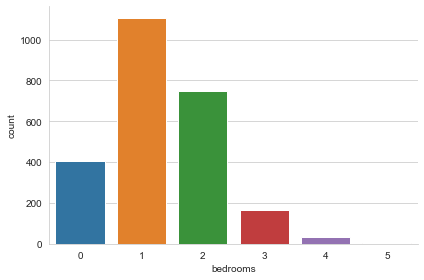

In [7]:
sns.countplot(x='bedrooms', data=df)
sns.despine()  # Remove the top and right spines from plot(s)
plt.tight_layout()

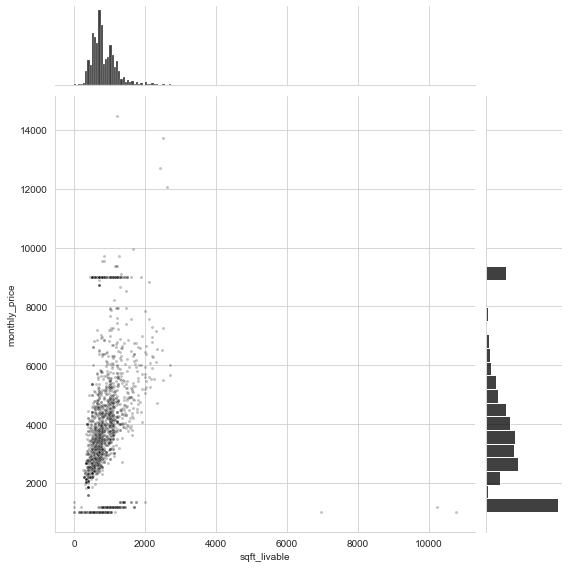

In [8]:
sns.jointplot(
    x='sqft_livable',
    y='monthly_price',
    data=df,
    height=8,
    alpha=.25,
    color='k',
    marker='.'
)
plt.tight_layout()

### Remove Outliers By Filtering

In [9]:
below_10k_price_mask = df.monthly_price < 10000
below_4k_sqft_mask = df.sqft_livable < 4000
df_filtered = df[below_10k_price_mask & below_4k_sqft_mask]

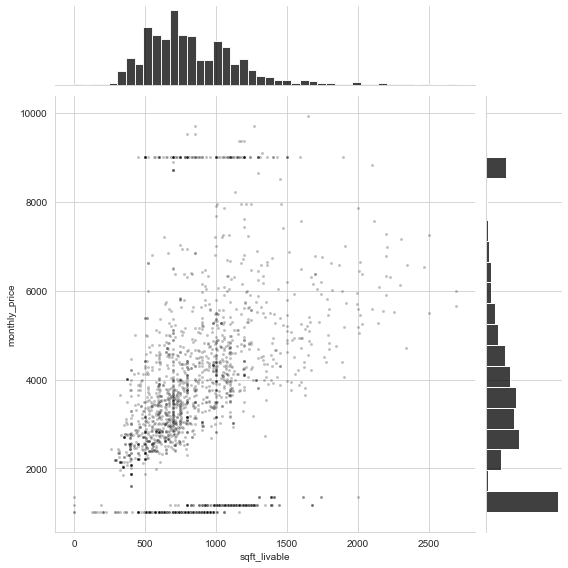

In [10]:
sns.jointplot(
    x='sqft_livable',
    y='monthly_price',
    data=df_filtered,
    height=8,
    alpha=.25,
    color='k',
    marker='.'
)
plt.tight_layout()

### Joining With Other Tables

In [11]:
leases_df = retrieve_leases()

In [12]:
listings_df = df  # using a more descriptive variable name

In [13]:
listings_leases_df = pd.merge(
    left=listings_df,
    right=leases_df,
    on='listing_id'
#     left_on='listing_id',
#     right_on='listing_id',
)

In [14]:
listings_leases_df.head()

,listing_id,bedrooms,bathrooms,sqft_livable,monthly_price,lease_start,lease_end,status
0,823,1,1.5,751.0,3988,2020-12-29,2021-03-31,approved
1,823,1,1.5,751.0,3988,2021-03-31,2021-05-31,approved
2,823,1,1.5,751.0,3988,2020-11-14,2020-12-14,approved
3,823,1,1.5,751.0,3988,2020-01-20,2020-01-24,approved
4,823,1,1.5,751.0,3988,2019-11-10,2019-12-15,approved


### Time Series Analysis

In [15]:
listings_leases_df.lease_start = pd.to_datetime(listings_leases_df.lease_start)

In [16]:
listings_leases_df['lease_start_month'] = listings_leases_df.lease_start.values.astype('<M8[M]')  # date trunc by month

In [17]:
listings_leases_df.head()

,listing_id,bedrooms,bathrooms,sqft_livable,monthly_price,lease_start,lease_end,status,lease_start_month
0,823,1,1.5,751.0,3988,2020-12-29,2021-03-31,approved,2020-12-01
1,823,1,1.5,751.0,3988,2021-03-31,2021-05-31,approved,2021-03-01
2,823,1,1.5,751.0,3988,2020-11-14,2020-12-14,approved,2020-11-01
3,823,1,1.5,751.0,3988,2020-01-20,2020-01-24,approved,2020-01-01
4,823,1,1.5,751.0,3988,2019-11-10,2019-12-15,approved,2019-11-01


In [18]:
leases_by_month = listings_leases_df.groupby(['lease_start_month', 'bedrooms']).count()

In [19]:
leases_by_month = leases_by_month.reset_index()

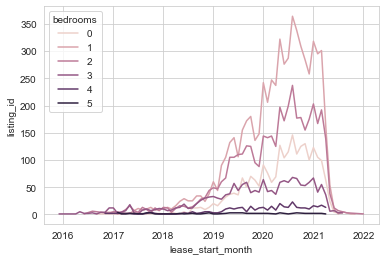

In [20]:
sns.lineplot(
    data=leases_by_month,
    x='lease_start_month',
    y='listing_id',  # this is actually the count of leases
    hue='bedrooms'
)
plt.show()